In [1]:
# Use this cell to regroup all your imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

# 🏆 Basic Linear Regression

A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## Load

In [2]:
data = pd.read_csv("data/CarPrice_Assignment.csv")
X = data.drop(columns=['car_ID', 'price'])
y = data['price']

In [3]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (205, 24)
y shape: (205,)


# Visualise

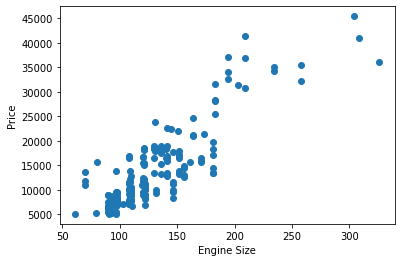

In [4]:
# scatter plot of engine size against price
plt.scatter(X.enginesize, y)

# add labels
plt.xlabel('Engine Size')
plt.ylabel('Price');

# Single-variable

In [7]:
X = X[['enginesize']]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)

cv_results

{'fit_time': array([0.01254678, 0.01513433, 0.01166224, 0.01041055, 0.01048303]),
 'score_time': array([0.01344037, 0.01269197, 0.00741291, 0.00857902, 0.0068686 ]),
 'test_score': array([0.74864137, 0.84011735, 0.18798229, 0.74161948, 0.26725142])}

In [9]:
cv_results['test_score'].mean()

0.557122381192232

👇 Plot the evolution of total computational time and mean score as Kfolds increases from 2 until 40.

In [10]:
cv_results = cross_validate(model, X, y, cv=30)

In [11]:
time = []
mean_score = []
model = LinearRegression()
for k in range(2, 41):
    cv_results = cross_validate(model, X, y, scoring='r2', cv=k)
    fit_time = cv_results['fit_time'].sum()
    score = cv_results['test_score'].mean()
    time.append(fit_time)
    mean_score.append(score)

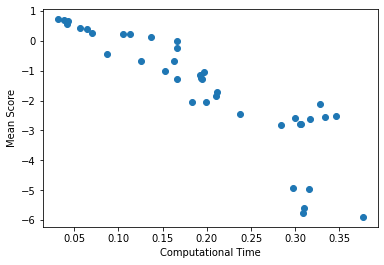

In [12]:
plt.scatter(time, mean_score)

plt.xlabel('Computational Time')
plt.ylabel('Mean Score');

# Train the model 

Would not do this in practice without a train/test split. This is just for demonstration purposes

In [13]:
# Instanciate the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression()

In [14]:
slope = model.coef_

In [15]:
intercept = model.intercept_

In [16]:
best_fit_line = intercept + slope*X

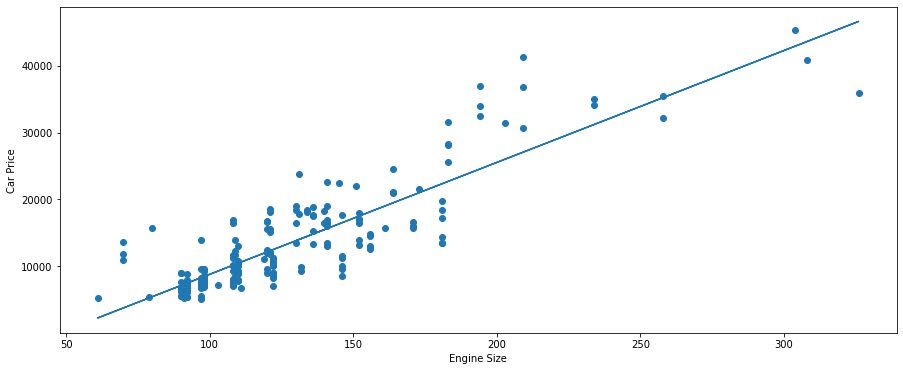

In [17]:
plt.figure(figsize=(15, 6))

#Plot scatter 
plt.scatter(X, y)

#Plot line of best fit
y_values = intercept + slope*X
plt.plot(X, y_values)

plt.xlabel('Engine Size')
plt.ylabel('Car Price');

# Learning curves

In [18]:
from sklearn.model_selection import learning_curve

train_sizes = [25, 50, 75, 100, 125, 150]

train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

In [19]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

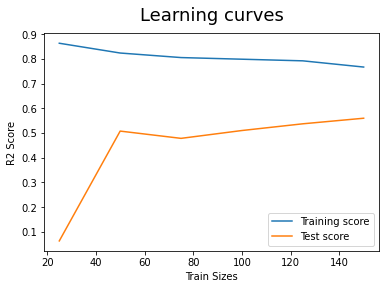

In [20]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')

plt.xlabel('Train Sizes')
plt.ylabel('R2 Score')

plt.title('Learning curves', fontsize = 18, y = 1.03)

plt.legend();

## Adding new features

In [21]:
# define new features
X = data[['enginesize', 'horsepower', 'curbweight', 'highwaympg']]

#instanciate new model
model_2 = LinearRegression()

#store results from cross validation with 5 folds
cv_results = cross_validate(model, X, y, cv=5)

#save mean score to variable
score_added_features = cv_results['test_score'].mean()
score_added_features

0.5493246646003536

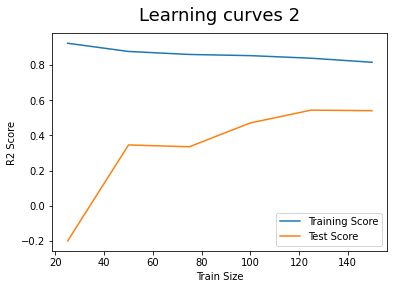

In [22]:
# Return train scores and test scores
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=train_sizes, cv=5)

# calcualte mean for each fold
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot each train size against the corresponding train/test score
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Test Score")

plt.xlabel("Train Size")
plt.ylabel("R2 Score")

plt.title('Learning curves 2', fontsize = 18, y = 1.03)


plt.legend();

# Baseline

In [24]:
X = data.drop(columns=['car_ID', 'price'])
y = data['price']

In [25]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [26]:
X_numeric = X.select_dtypes(include=np.number)

In [29]:
X_numeric.shape

(205, 14)

In [35]:
model = LinearRegression()
cv_results = cross_validate(model, X_numeric, y, cv=10, scoring='r2')
cv_results['test_score'].mean()

0.20998422273225703

# Logistic Regression

In [67]:
from sklearn.preprocessing import Binarizer

X = data[['enginesize', 'horsepower', 'curbweight', 'highwaympg']]

y = data[['price']]
y_binarized = Binarizer(threshold=y.mean()[0]).fit_transform(y)
y_binarized = np.ravel(y_binarized)

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

# 5 fold cv
cv_results = cross_validate(model, X, y_binarized, cv=5)

# store result
accuracy = cv_results['test_score'].mean()
accuracy

0.878048780487805

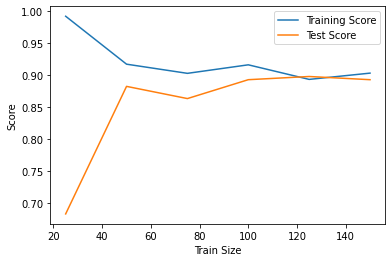

In [70]:
train_sizes, train_scores, test_scores = learning_curve(
                                                        estimator=LogisticRegression(max_iter=1000), 
                                                        X=X, 
                                                        y=y_binarized, 
                                                        train_sizes=[25,50,75,100,125,150], 
                                                        cv=20
                                                       )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.xlabel('Train Size')
plt.ylabel('Score')

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Test Score')

plt.legend();